# H1b Visa prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, f1_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
!pwd

/Users/srinivasaluri/swarna-DS/Metis/Metis_BC/Challenges/Project3


In [3]:
df = pd.read_csv('h1b_case_status.csv')
df.head

<bound method NDFrame.head of          Unnamed: 0       id case_status  \
0                 0        1   CERTIFIED   
1                 1       11   CERTIFIED   
2                 2       43   CERTIFIED   
3                 3       75   CERTIFIED   
4                 4      116   CERTIFIED   
...             ...      ...         ...   
1893240     1893240  3002354      DENIED   
1893241     1893241  3002355      DENIED   
1893242     1893242  3002357      DENIED   
1893243     1893243  3002365      DENIED   
1893244     1893244  3002368      DENIED   

                                          employer_name  \
0                                            university   
1                                      hj heinz company   
2                                           sparity inc   
3                                            university   
4                                   stryker corporation   
...                                                 ...   
1893240  centers for disease

In [87]:
df['soc_status'][df['soc_status'].str.contains('computer','software')] = 'it'
df['soc_status'][df['soc_status'].str.contains('chief','management')] = 'manager'
df['soc_status'][df['soc_status'].str.contains('mechanical')] = 'mechanical'
df['soc_status'][df['soc_status'].str.contains('database')] = 'database'
df['soc_status'][df['soc_status'].str.contains('sales','market')] = 'scm'
df['soc_status'][df['soc_status'].str.contains('financial')] = 'finance'
df['soc_status'][df['soc_status'].str.contains('public','fundraising')] = 'pr'
df['soc_status'][df['soc_status'].str.contains('education','law')] = 'administrative'
df['soc_status'][df['soc_status'].str.contains('auditors','compliance')] = 'audit'
df['soc_status'][df['soc_status'].str.contains('distribution','logistics')] = 'scm'
df['soc_status'][df['soc_status'].str.contains('recruiters','human')] = 'hr'
df['soc_status'][df['soc_status'].str.contains('agricultural','farm')] = 'agri'
df['soc_status'][df['soc_status'].str.contains('construction','architectural')] = 'estate'
df['soc_status'][df['soc_status'].str.contains('forencsic','health')] = 'medical'
df['soc_status'][df['soc_status'].str.contains('teachers')] = 'education'
df['soc_status'][df['soc_status'].str.contains('programmer')] = 'it'
df['soc_status'][df['soc_status'].str.contains('')] = 'it'



/Users/srinivasaluri/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/srinivasaluri/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.soc_status.value_counts()

computer systems analysts               401373
software developers                     337699
computer programmers                    310008
computer occupations                    164599
management analysts                      46127
                                         ...  
engineering teachers - postsecondary         1
microsystems engineers                       1
datebase administrators                      1
softwware developer                          1
chemical engineer                            1
Name: soc_status, Length: 730, dtype: int64

In [7]:
jobs_dummy = pd.get_dummies(df.jobs_other)
employer_dummy = pd.get_dummies(df.employer_other)

In [9]:
df = pd.concat([df,employer_dummy, jobs_dummy], axis = 1)

In [10]:
df = df.dropna()

In [11]:
df.shape

(1849351, 68)

In [12]:
df1 = df.drop(['Unnamed: 0','id','employer_name','soc_status','job_title','year','work_location', 'soc_other','state', 'lat', 'lon', 'employer_other'], axis = 1)

In [13]:
df1.head(5)

,case_status,full_time,salary,west,mid_west,north_east,south,jobs_other,accenture llp,amazon corporate llc,...,RESEARCH ASSOCIATE,SENIOR CONSULTANT,SENIOR SOFTWARE ENGINEER,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,SYSTEMS ANALYST,SYSTEMS ENGINEER US,TECHNOLOGY ANALYST US,TECHNOLOGY LEAD US,other
0,CERTIFIED,N,36067.0,0,1,0,0,other,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CERTIFIED,Y,182978.0,0,0,1,0,other,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CERTIFIED,Y,102190.0,0,0,0,1,other,0,0,...,0,0,0,0,0,0,0,0,0,1
3,CERTIFIED,Y,75293.0,0,0,1,0,other,0,0,...,0,0,0,0,0,0,0,0,0,1
4,CERTIFIED,Y,189862.0,0,1,0,0,other,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
df1.columns = [x.lower() for x in df1.columns]

In [192]:
list(df1.columns)

['case_status',
 'full_time',
 'salary',
 'west',
 'mid_west',
 'north_east',
 'south',
 'accenture llp',
 'amazon corporate llc',
 'apple inc',
 'capgemini america inc',
 'cognizant technology solutions us corporation',
 'deloitte  touche llp',
 'deloitte consulting llp',
 'ernst  young us llp',
 'google inc',
 'hcl america inc',
 'ibm corporation',
 'ibm india private limited',
 'igate technologies inc',
 'infosys limited',
 'intel corporation',
 'jpmorgan chase  co',
 'larsen  toubro infotech limited',
 'microsoft corporation',
 'oracle america inc',
 'other',
 'tata consultancy services limited',
 'tech mahindra americas inc',
 'tech mahindra americasinc',
 'university',
 'ust global inc',
 'wipro limited',
 'assistant professor',
 'business analyst',
 'computer programmer',
 'computer programmer analyst',
 'computer systems analyst',
 'consultant',
 'database administrator',
 'developer',
 'lead engineer',
 'physical therapist',
 'programmer analyst',
 'project manager',
 'researc

In [15]:
df1 = df1.drop(['jobs_other'], axis = 1)

In [16]:
df1.replace(['Y', 'N'], [1,0], inplace = True)

In [17]:
df1.replace(['CERTIFIED', 'DENIED'], [0,1], inplace = True)

In [18]:
df1 = df1.dropna()

### Random Forest

In [19]:
X = df1.iloc[:, 1:]
y = df1.iloc[:, 0]
print(X.shape, y.shape)

(1849351, 54) (1849351,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rdf.fit(X_train, y_train)
rdf.score(X_train, y_train)
y_pred = rdf.predict(X_test)  

In [22]:
#Scores for random forest model
print(accuracy_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      f1_score(y_test, y_pred),
     roc_auc_score(y_test, y_pred))

0.9884067688464356 0.940677966101695 0.04937722419928826 0.09382924767540153 0.5246694537007388


In [23]:
print("Random forest confusion matrix: \n\n", confusion_matrix(y_test, rdf.predict(X_test)))

Random forest confusion matrix: 

 [[365361     14]
 [  4274    222]]


In [29]:
predict_proba = rdf.predict_proba(X_test)[:,1]
fpr_rdf, tpr_rdf, thresholds = metrics.roc_curve(y_test,predict_proba)

#### Threshold_adjustment(F1_score)
Make test and train split followed by train and validation sets. validate F1 score on val_set and score on test_set.

In [25]:
#make test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)


In [26]:
rdf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rdf.fit(X_tr, y_tr)
rdf.score(X_tr, y_tr)
y_pred = rdf.predict(X_val)

AttributeError: 'Text' object has no property 'colour'

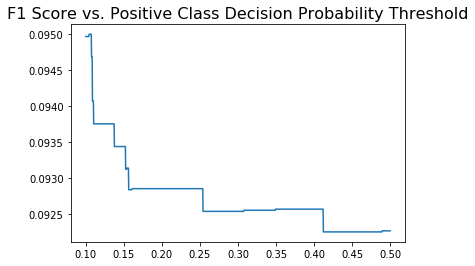

In [137]:
#dummy threshold
thresh_ps = np.linspace(.10,.50,1000)
#predicting probabilities
rdf_val_probs = rdf.predict_proba(X_val)[:,1]
f1_scores = []
for p in thresh_ps:
    rdf_val_labels = rdf_val_probs >= p
    f1_scores.append(f1_score(y_val, rdf_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold', fontsize = 16, colour = 'blue')
plt.xlabel('P threshold', fontsize = 14)
plt.ylabel('F1 score', fontsize = 14)

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

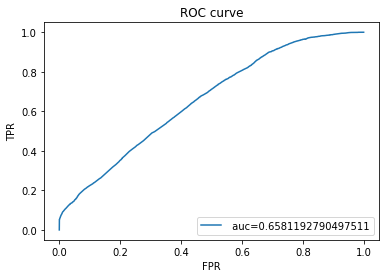

In [196]:
auc_rdf = np.trapz(tpr_rdf,fpr_rdf)
plt.plot(fpr_rdf,tpr_rdf,label=" auc="+str(auc_rdf))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

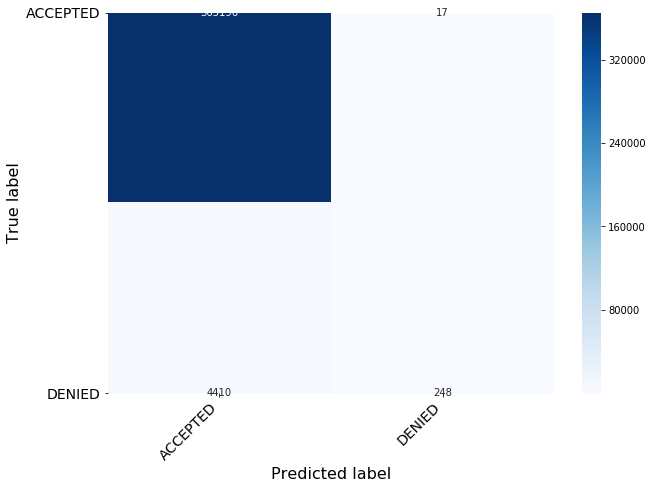

In [197]:
cm = print_confusion_matrix(confusion_matrix(y_test, rdf.predict(X_test)), ['ACCEPTED', 'DENIED'])

### LogisticRegression

In [35]:
log = LogisticRegression(class_weight = {1:5, 0:1})
log.fit(X_train, y_train)
log.score(X_train, y_train)
log_y_pred = log.predict(X_test)

/Users/srinivasaluri/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
print(accuracy_score(y_test, log_y_pred),
      precision_score(y_test, log_y_pred),
      recall_score(y_test, log_y_pred),
      f1_score(y_test, log_y_pred))

0.9877247469945701 0.9943502824858758 0.03649181007671574 0.0704


## Over sampling using SMOTE

In [96]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot= True, fmt="d", cmap = 'Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
   
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)
    return fig

In [198]:
X = df1.iloc[:, 1:]
y = df1.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state=42)


In [199]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)
print(y_train.value_counts(), np.bincount(y_smoted))

0    1461311
1      18169
Name: case_status, dtype: int64 [1461311 1461311]


### Oversample Logistic Regression 

In [200]:
log_sm = LogisticRegression(C = 1, class_weight = {1:5, 0:1}, solver = 'liblinear')
log_sm.fit(X_smoted, y_smoted)
y_pred = log_sm.predict(X_test)
print(accuracy_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      f1_score(y_test, y_pred))

0.012628727313036167 0.012628727313036167 1.0 0.02494246306155251


In [201]:
print("LogisticRegression confusion matrix: \n\n", confusion_matrix(y_test, log_sm.predict(X_test)))

LogisticRegression confusion matrix: 

 [[     0 365200]
 [     0   4671]]


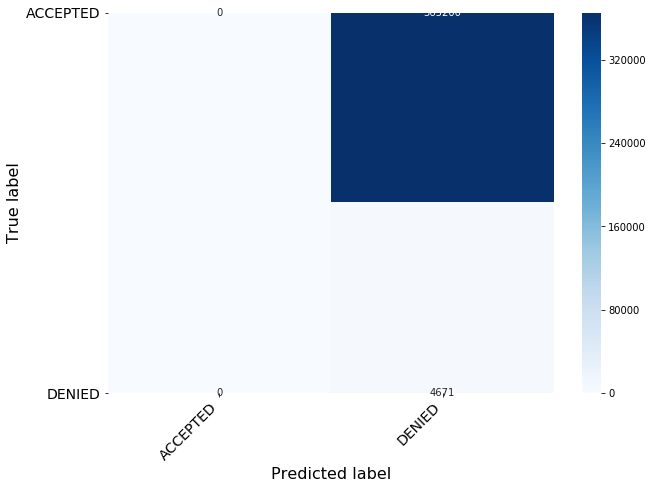

In [202]:
cm = print_confusion_matrix(confusion_matrix(y_test, log_sm.predict(X_test)), ['ACCEPTED', 'DENIED'])



### Oversampling RandomForest

In [203]:
rdf_sm = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 3)
rdf_sm.fit(X_smoted, y_smoted)
rdf_sm.score(X_smoted, y_smoted)


0.853965035505789

In [204]:
rdf_sm_y_pred = rdf_sm.predict(X_test)
print(accuracy_score(y_test, rdf_sm_y_pred),
      precision_score(y_test, rdf_sm_y_pred),
      recall_score(y_test, rdf_sm_y_pred),
      f1_score(y_test, rdf_sm_y_pred))

0.958699114015427 0.0386322109109893 0.09505459216441875 0.05493689680772087


In [205]:
print("Over sampling Random forest matrix: \n\n", confusion_matrix(y_test, rdf_sm.predict(X_test)))

Over sampling Random forest matrix: 

 [[354151  11049]
 [  4227    444]]


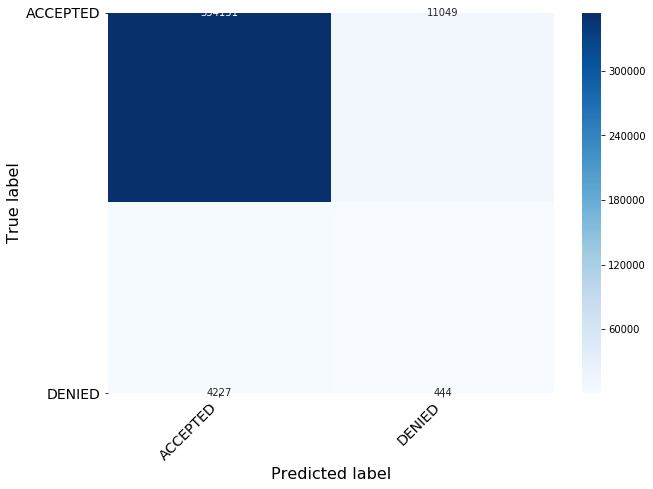

In [206]:
cm = print_confusion_matrix(confusion_matrix(y_test, rdf_sm.predict(X_test)), ['ACCEPTED', 'DENIED'])


## XGBoost

In [58]:
X = np.array(df1.iloc[:, 1:])
y = np.array(df1.iloc[:, 0])
print(X.shape, y.shape)

(1893238, 54) (1893238,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [71]:
import xgboost 
xgb =xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=6, max_features='sqrt', min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [123]:
from xgboost import XGBClassifier

xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [128]:
print(recall_score(y_test,xgb_y_pred),
      f1_score(y_test,xgb_y_pred))

0.05017623885548414 0.09540705696826338


In [157]:
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test,xgb_y_pred))


[[373817      8]
 [  4581    242]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    373825
           1       0.97      0.05      0.10      4823

   micro avg       0.99      0.99      0.99    378648
   macro avg       0.98      0.53      0.54    378648
weighted avg       0.99      0.99      0.98    378648



In [188]:
from sklearn.metrics import confusion_matrix
print("XGBoost confusion matrix: \n\n", confusion_matrix(y_test, xgb.predict(X_test)))

XGBoost confusion matrix: 

 [[373817      8]
 [  4581    242]]


### split the data into obj and eval sets and try XGB

In [39]:
X = np.array(df1.iloc[:, 1:])
y = np.array(df1.iloc[:, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 2)
                                                   

In [40]:
import xgboost
gbm =  xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, max_features='sqrt', min_child_weight=3, missing=None,
       n_estimators=30000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [41]:
gbm_eval_set = [(X_train, y_train),(X_val, y_val)]
fit_gbm = gbm.fit(X_train, y_train, 
                  eval_set = gbm_eval_set,
                  eval_metric = 'error',
                  early_stopping_rounds = 50,
                  verbose = False)

In [43]:
print(accuracy_score(y_test, gbm.predict(X_test, ntree_limit = gbm.best_ntree_limit)))
print(precision_score(y_test,gbm.predict(X_test, ntree_limit = gbm.best_ntree_limit)))
print(recall_score(y_test,gbm.predict(X_test, ntree_limit = gbm.best_ntree_limit)))
print(f1_score(y_test, gbm.predict(X_test, ntree_limit = gbm.best_ntree_limit)))

0.9880336657915868
0.9360902255639098
0.053456419063975955
0.10113728675873274


In [45]:
from sklearn.metrics import confusion_matrix
print("XGBoost confusion matrix: \n\n", confusion_matrix(y_test, gbm.predict(X_test)))

XGBoost confusion matrix: 

 [[365196     17]
 [  4409    249]]


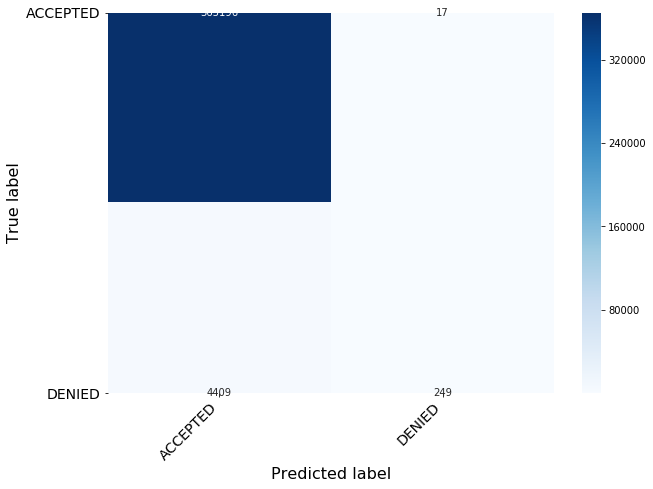

In [102]:
cm = print_confusion_matrix(confusion_matrix(y_test, gbm.predict(X_test)), ['ACCEPTED', 'DENIED'])

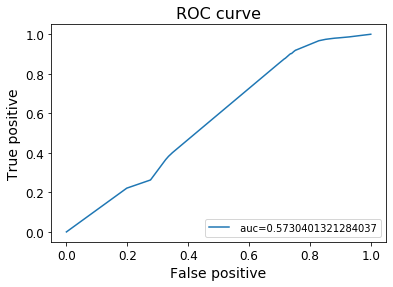

In [115]:
#generate ROC curve
predict_proba = gbm.predict_proba(X_test > 0.1)
fpr_gbm, tpr_gbm, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
auc_gbm = np.trapz(tpr_gbm,fpr_gbm)
plt.plot(fpr_gbm,tpr_gbm,label=" auc="+str(auc_gbm))
plt.xlabel('False positive', fontsize = 14)
plt.ylabel('True positive', fontsize = 14)
plt.title('ROC curve', fontsize = 16)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend(loc=4)
plt.show()

In [47]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

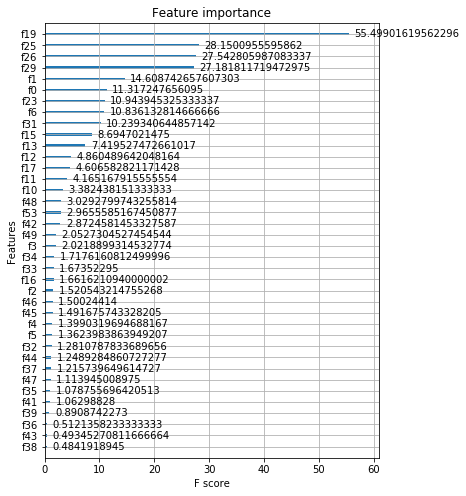

In [122]:
feature_imp = (my_plot_importance(gbm,importance_type = 'gain', figsize=(6,8))

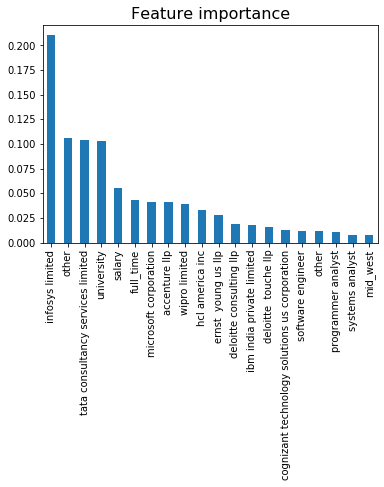

In [212]:
feat_importances = pd.Series(gbm.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.title('Feature importance', fontsize = 16)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


### XGBoost without evaluation

In [73]:
X = np.array(df1.iloc[:, 1:])
y = np.array(df1.iloc[:, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40)
gbm =  xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, max_features='sqrt', min_child_weight=3, missing=None,
       n_estimators=30000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)


In [ ]:
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [156]:
print(confusion_matrix(y_test, gbm_y_pred))
print(classification_report(y_test,gbm_y_pred))


[[373812     13]
 [  4570    253]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    373825
           1       0.95      0.05      0.10      4823

   micro avg       0.99      0.99      0.99    378648
   macro avg       0.97      0.53      0.55    378648
weighted avg       0.99      0.99      0.98    378648



In [158]:
roc_auc_score(y_test, gbm_y_pred)

0.5262111006774853

In [61]:
predict_proba = xgb.predict_proba(X_test[:, 1] >= 0.1)
fpr_xgb, tpr_xgb, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])

NameError: name 'xgb' is not defined

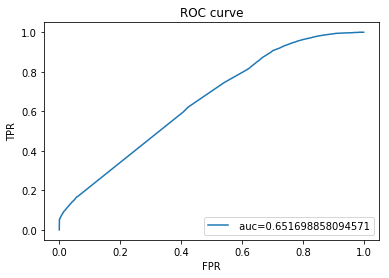

In [185]:
auc_xgb = np.trapz(tpr_xgb,fpr_xgb)
plt.plot(fpr_xgb,tpr_xgb,label=" auc="+str(auc_xgb))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

In [189]:
print("XGBoost confusion matrix: \n\n", confusion_matrix(y_test, gbm.predict(X_test)))


XGBoost confusion matrix: 

 [[373812     13]
 [  4570    253]]


In [63]:
gbm.get_booster().get_score(importance_type='gain')

{'f1': 14.608742657607303,
 'f19': 55.49901619562296,
 'f29': 27.181811719472975,
 'f25': 28.1500955595862,
 'f13': 7.419527472661017,
 'f12': 4.860489642048164,
 'f17': 4.606582821171428,
 'f0': 11.317247656095,
 'f53': 2.9655585167450877,
 'f3': 2.0218899314532774,
 'f26': 27.542805987083337,
 'f11': 4.165167915555554,
 'f42': 2.8724581453327587,
 'f48': 3.0292799743255814,
 'f10': 3.382438151333333,
 'f16': 1.6616210940000002,
 'f2': 1.520543214755268,
 'f37': 1.215739649614727,
 'f6': 10.836132814666666,
 'f23': 10.943945325333337,
 'f31': 10.239340644857142,
 'f49': 2.0527304527454544,
 'f4': 1.3990319694688167,
 'f44': 1.2489284860727277,
 'f45': 1.491675743328205,
 'f5': 1.3623983863949207,
 'f32': 1.2810787833689656,
 'f35': 1.078755696420513,
 'f36': 0.5121358233333333,
 'f34': 1.7176160812499996,
 'f38': 0.4841918945,
 'f47': 1.113945008975,
 'f43': 0.49345270811666664,
 'f15': 8.6947021475,
 'f33': 1.67352295,
 'f39': 0.8908742273,
 'f46': 1.50024414,
 'f41': 1.06298828}